<a href="https://colab.research.google.com/github/NoahGal-19/Group8/blob/main/YIKE_QM2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

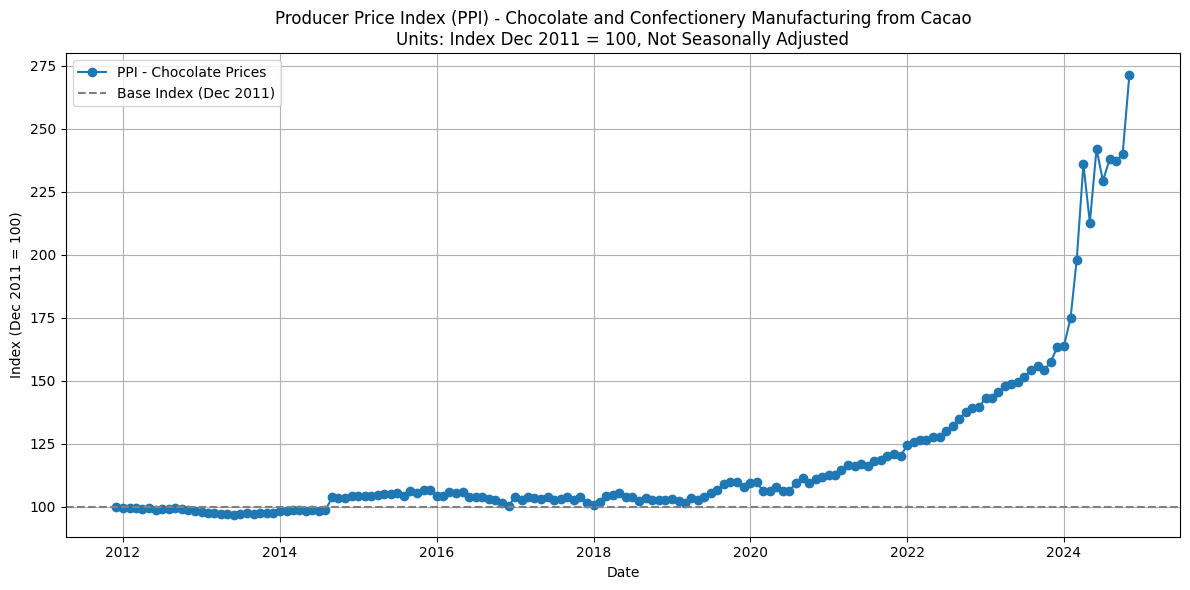

In [ ]:
#Trend Visualisation for Cocolates
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Chocolate_Price.csv'
data = pd.read_csv(file_path)

data['observation_date'] = pd.to_datetime(data['observation_date'])

plt.figure(figsize=(12, 6))
plt.plot(data['observation_date'], data['PCU311351311351'], marker='o', linestyle='-', label='PPI - Chocolate Prices')

plt.title('Producer Price Index (PPI) - Chocolate and Confectionery Manufacturing from Cacao\nUnits: Index Dec 2011 = 100, Not Seasonally Adjusted')
plt.xlabel('Date')
plt.ylabel('Index (Dec 2011 = 100)')

plt.axhline(y=100, color='gray', linestyle='--', label='Base Index (Dec 2011)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

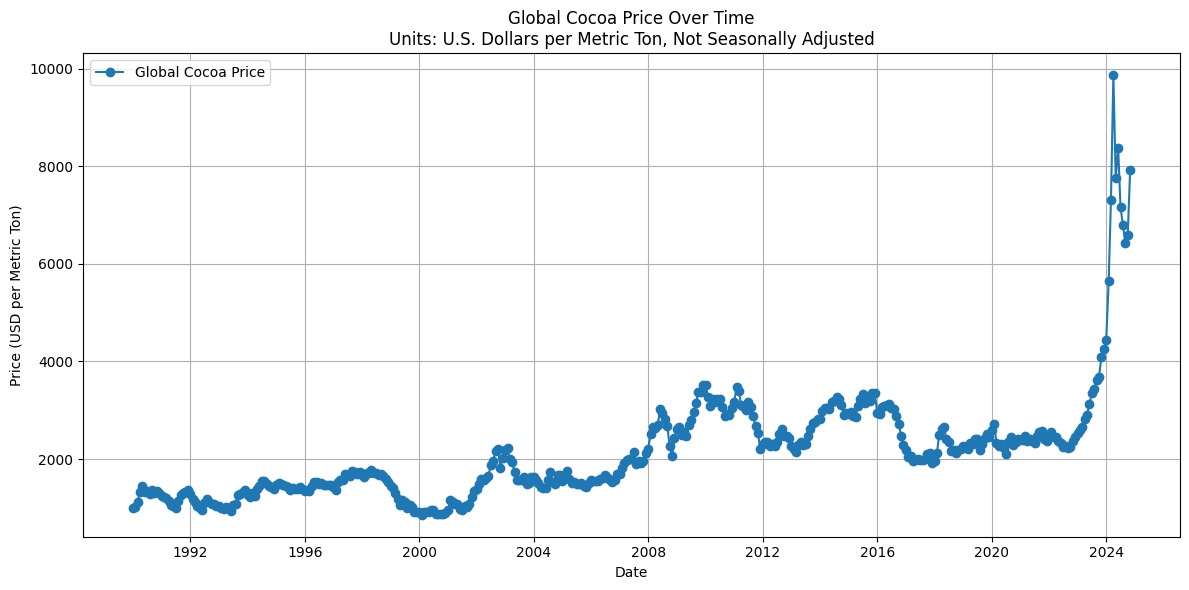

In [ ]:
#Trend Visualisation for Cocoa
file_path = 'Cocoa_Price.csv'
data = pd.read_csv(file_path)

data['observation_date'] = pd.to_datetime(data['observation_date'])

plt.figure(figsize=(12, 6))
plt.plot(data['observation_date'], data['PCOCOUSDM'], marker='o', linestyle='-', label='Global Cocoa Price')

plt.title('Global Cocoa Price Over Time\nUnits: U.S. Dollars per Metric Ton, Not Seasonally Adjusted')
plt.xlabel('Date')
plt.ylabel('Price (USD per Metric Ton)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Correlation Analysis
cocoa_df = pd.read_csv('Cocoa_Price.csv')
chocolate_df = pd.read_csv('Chocolate_Price.csv')
cocoa_head = cocoa_df.head()
chocolate_head = chocolate_df.head()
print(cocoa_head)
print(chocolate_head)

  observation_date  PCOCOUSDM
0       1990-01-01      995.0
1       1990-02-01     1022.0
2       1990-03-01     1131.0
3       1990-04-01     1336.0
4       1990-05-01     1443.0
  observation_date  PCU311351311351
0       2011-12-01            100.0
1       2012-01-01             99.6
2       2012-02-01             99.7
3       2012-03-01             99.7
4       2012-04-01             99.3


In [ ]:
merged_df = pd.merge(cocoa_df, chocolate_df, on='observation_date', how='inner')

merged_df.rename(columns={
    'PCOCOUSDM': 'Cocoa_Price',
    'PCU311351311351': 'Chocolate_Price'
}, inplace=True)

correlation_matrix = merged_df[['Cocoa_Price', 'Chocolate_Price']].corr(method='pearson')

print(merged_df.head())
print(correlation_matrix)

  observation_date  Cocoa_Price  Chocolate_Price
0       2011-12-01  2200.605172            100.0
1       2012-01-01  2307.761849             99.6
2       2012-02-01  2356.239881             99.7
3       2012-03-01  2359.251293             99.7
4       2012-04-01  2266.782894             99.3
                 Cocoa_Price  Chocolate_Price
Cocoa_Price          1.00000          0.87268
Chocolate_Price      0.87268          1.00000


T-Test Results:
T-Statistic: -9.848578590970828
P-Value: 4.726835657181729e-18

ANOVA Test Results:
F-Statistic: 155.1160212255405
P-Value: 5.707368362887361e-77


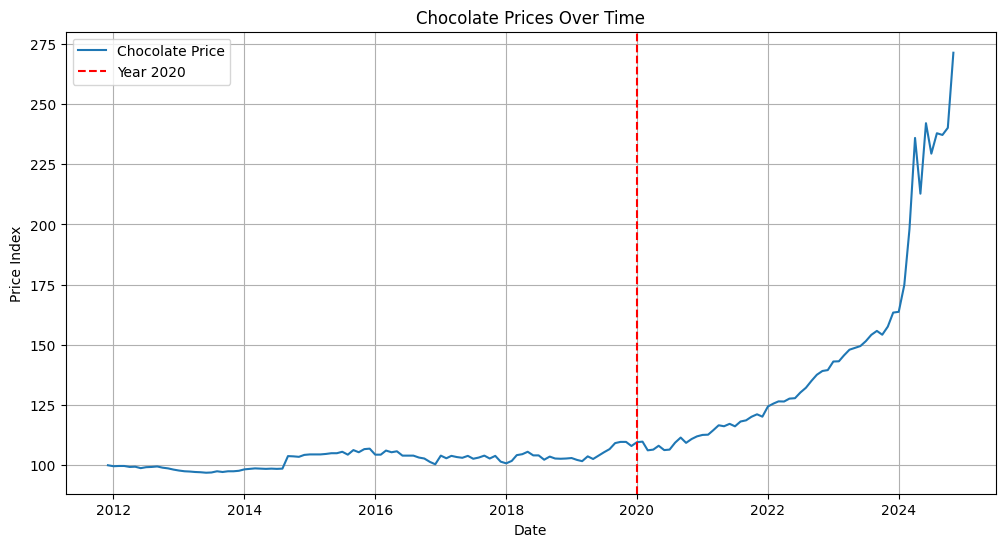

In [ ]:
from scipy import stats

chocolate_file_path = 'Chocolate_Price.csv'
cocoa_file_path = 'Cocoa_Price.csv'

chocolate_df = pd.read_csv(chocolate_file_path)
cocoa_df = pd.read_csv(cocoa_file_path)

# Rename columns
chocolate_df.rename(columns={'PCU311351311351': 'Chocolate_Price'}, inplace=True)
cocoa_df.rename(columns={'PCOCOUSDM': 'Cocoa_Price'}, inplace=True)

# Merge datasets
merged_df = pd.merge(cocoa_df, chocolate_df, on='observation_date', how='inner')
merged_df['observation_date'] = pd.to_datetime(merged_df['observation_date'])
merged_df.set_index('observation_date', inplace=True)
merged_df['Year'] = merged_df.index.year

# Split data into two groups: Before and After 2020
before_2020 = merged_df[merged_df['Year'] < 2020]['Chocolate_Price']
after_2020 = merged_df[merged_df['Year'] >= 2020]['Chocolate_Price']

# Perform T-Test
t_stat, p_value = stats.ttest_ind(before_2020, after_2020)
print("T-Test Results:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Perform ANOVA Test across years
anova_result = stats.f_oneway(
    *[merged_df[merged_df['Year'] == year]['Chocolate_Price'] for year in merged_df['Year'].unique()]
)
print("\nANOVA Test Results:")
print(f"F-Statistic: {anova_result.statistic}")
print(f"P-Value: {anova_result.pvalue}")

# Plot Chocolate Prices over time
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Chocolate_Price'], label='Chocolate Price')
plt.axvline(pd.Timestamp('2020-01-01'), color='red', linestyle='--', label='Year 2020')
plt.title('Chocolate Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price Index')
plt.legend()
plt.grid(True)
plt.show()

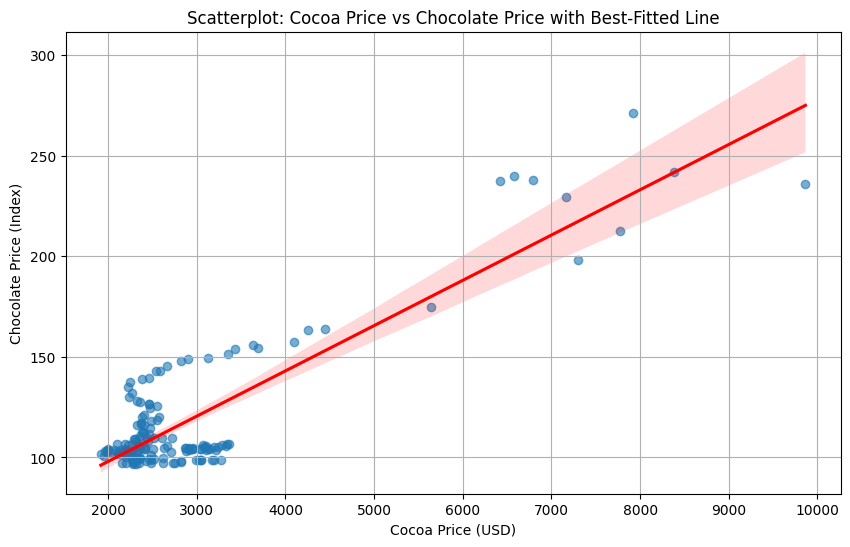

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
cocoa_file_path = 'Cocoa_Price.csv'
chocolate_file_path = 'Chocolate_Price.csv'

cocoa_df = pd.read_csv(cocoa_file_path)
chocolate_df = pd.read_csv(chocolate_file_path)

cocoa_df.rename(columns={'PCOCOUSDM': 'Cocoa_Price'}, inplace=True)
chocolate_df.rename(columns={'PCU311351311351': 'Chocolate_Price'}, inplace=True)

data = pd.merge(cocoa_df, chocolate_df, on='observation_date', how='inner')

data['observation_date'] = pd.to_datetime(data['observation_date'])
data.set_index('observation_date', inplace=True)

plt.figure(figsize=(10, 6))
sns.regplot(x='Cocoa_Price', y='Chocolate_Price', data=data, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Scatterplot: Cocoa Price vs Chocolate Price with Best-Fitted Line')
plt.xlabel('Cocoa Price (USD)')
plt.ylabel('Chocolate Price (Index)')
plt.grid(True)
plt.show()

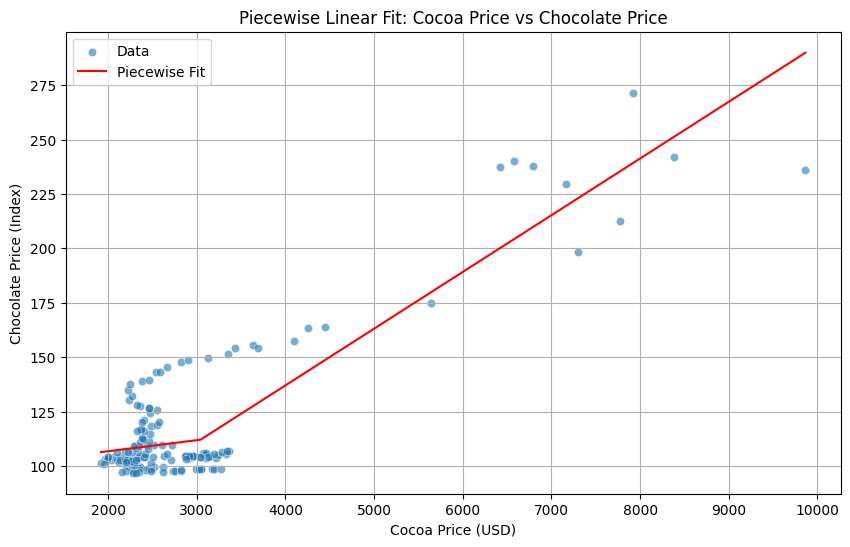

Breakpoint at Cocoa Price: 3041.66694968772
Slope before breakpoint: 0.00508140158591892
Slope after breakpoint: 0.026057362251755443


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

cocoa_file_path = 'Cocoa_Price.csv'
chocolate_file_path = 'Chocolate_Price.csv'
cocoa_df = pd.read_csv(cocoa_file_path)
chocolate_df = pd.read_csv(chocolate_file_path)
cocoa_df.rename(columns={'PCOCOUSDM': 'Cocoa_Price'}, inplace=True)
chocolate_df.rename(columns={'PCU311351311351': 'Chocolate_Price'}, inplace=True)
data = pd.merge(cocoa_df, chocolate_df, on='observation_date', how='inner')
data['observation_date'] = pd.to_datetime(data['observation_date'])
data.set_index('observation_date', inplace=True)

# Piecewise linear function
def piecewise_linear(x, x0, y0, k1, k2):
    """
    x0, y0: Breakpoint coordinates
    k1: Slope before breakpoint
    k2: Slope after breakpoint
    """
    return np.piecewise(x, [x < x0], [lambda x: k1*(x - x0) + y0, lambda x: k2*(x - x0) + y0])

# Fit the model
x = data['Cocoa_Price'].values
y = data['Chocolate_Price'].values
p0 = [np.median(x), np.median(y), 0, 0]
params, _ = curve_fit(piecewise_linear, x, y, p0)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cocoa_Price', y='Chocolate_Price', data=data, alpha=0.6, label='Data')
x_fit = np.linspace(min(x), max(x), 100)
y_fit = piecewise_linear(x_fit, *params)
plt.plot(x_fit, y_fit, color='red', label='Piecewise Fit')

plt.title('Piecewise Linear Fit: Cocoa Price vs Chocolate Price')
plt.xlabel('Cocoa Price (USD)')
plt.ylabel('Chocolate Price (Index)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Breakpoint at Cocoa Price: {params[0]}")
print(f"Slope before breakpoint: {params[2]}")
print(f"Slope after breakpoint: {params[3]}")

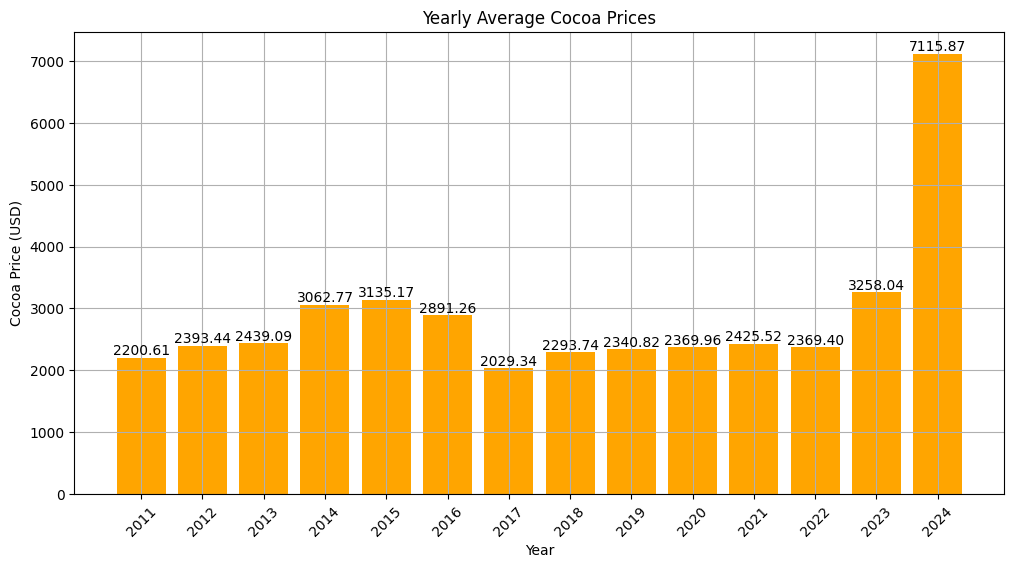

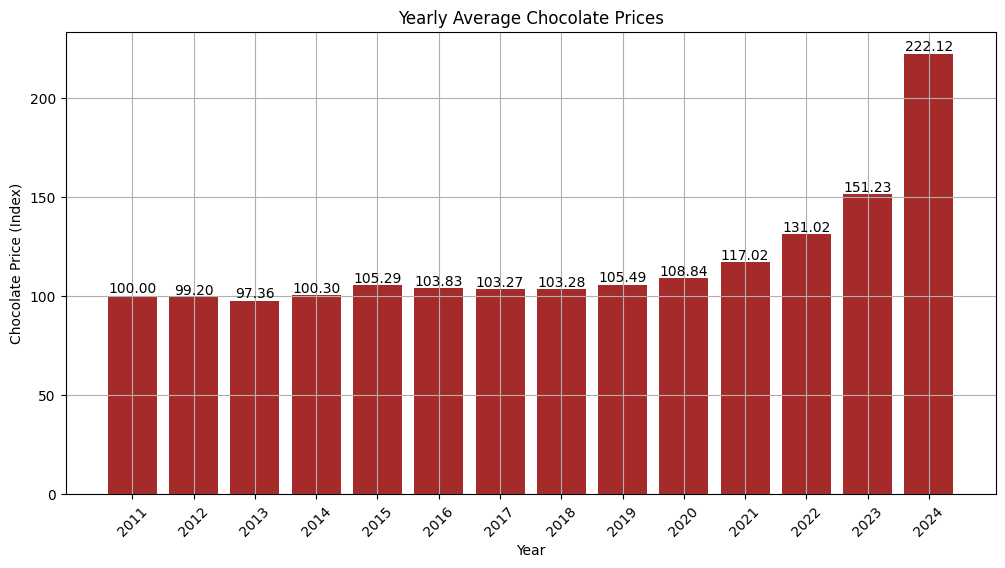

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cocoa_file_path = 'Cocoa_Price.csv'
chocolate_file_path = 'Chocolate_Price.csv'
cocoa_df = pd.read_csv(cocoa_file_path)
chocolate_df = pd.read_csv(chocolate_file_path)
cocoa_df.rename(columns={'PCOCOUSDM': 'Cocoa_Price'}, inplace=True)
chocolate_df.rename(columns={'PCU311351311351': 'Chocolate_Price'}, inplace=True)
data = pd.merge(cocoa_df, chocolate_df, on='observation_date', how='inner')
data['observation_date'] = pd.to_datetime(data['observation_date'])
data['Year'] = data['observation_date'].dt.year

# Calculate yearly averages
yearly_avg = data.groupby('Year')[['Cocoa_Price', 'Chocolate_Price']].mean()

# 1. Plot Cocoa Price Averages with Details
plt.figure(figsize=(12, 6))
bars = plt.bar(yearly_avg.index, yearly_avg['Cocoa_Price'], color='orange')

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.title('Yearly Average Cocoa Prices')
plt.xlabel('Year')
plt.ylabel('Cocoa Price (USD)')
plt.grid(True)
plt.xticks(yearly_avg.index, rotation=45)
plt.show()

# 2. Plot Chocolate Price Averages with Details
plt.figure(figsize=(12, 6))
bars = plt.bar(yearly_avg.index, yearly_avg['Chocolate_Price'], color='brown')

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.title('Yearly Average Chocolate Prices')
plt.xlabel('Year')
plt.ylabel('Chocolate Price (Index)')
plt.grid(True)
plt.xticks(yearly_avg.index, rotation=45)
plt.show()

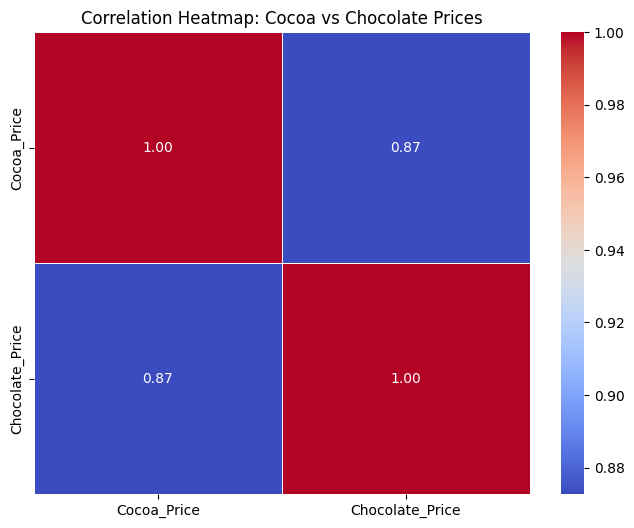

In [ ]:
import seaborn as sns
correlation = data[['Cocoa_Price', 'Chocolate_Price']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Cocoa vs Chocolate Prices')
plt.show()

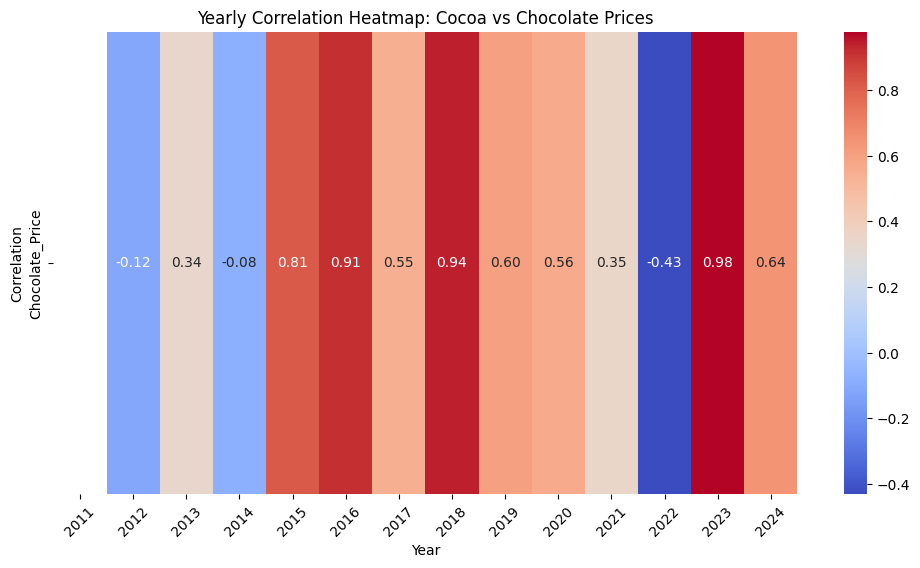

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cocoa_file_path = 'Cocoa_Price.csv'
chocolate_file_path = 'Chocolate_Price.csv'

cocoa_df = pd.read_csv(cocoa_file_path)
chocolate_df = pd.read_csv(chocolate_file_path)

cocoa_df.rename(columns={'PCOCOUSDM': 'Cocoa_Price'}, inplace=True)
chocolate_df.rename(columns={'PCU311351311351': 'Chocolate_Price'}, inplace=True)

data = pd.merge(cocoa_df, chocolate_df, on='observation_date', how='inner')

data['observation_date'] = pd.to_datetime(data['observation_date'])
data['Year'] = data['observation_date'].dt.year
data['Month'] = data['observation_date'].dt.strftime('%Y-%m')

yearly_corr = data.groupby('Year')[['Cocoa_Price', 'Chocolate_Price']].corr().iloc[0::2, -1].reset_index(level=1, drop=True)
monthly_corr = data.groupby('Month')[['Cocoa_Price', 'Chocolate_Price']].corr().iloc[0::2, -1].reset_index(level=1, drop=True)

plt.figure(figsize=(12, 6))
sns.heatmap(yearly_corr.to_frame().T, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Yearly Correlation Heatmap: Cocoa vs Chocolate Prices')
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()